In [1]:
import os
from glob import glob
import numpy as np
import dask
import xarray as xr
import xgcm
from xgcm.autogenerate import generate_grid_ds
from cmocean import cm

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

In [2]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster()
w = cluster.scale(14*2)

In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.148.0.28:50905 Dashboard: http://10.148.0.28:8787/status,Cluster Workers: 28 Cores: 28 Memory: 447.16 GiB


_________
# 1. Read dataset



In [5]:
out_dir_zarr = '/home1/datawork/xyu/OSMOSIS_llc4320/data_rechunk/'

grid = xr.open_dataset(out_dir_zarr+'Grid.nc', decode_coords=True)
ds_U = xr.open_zarr(out_dir_zarr+'U_total_rechunk.zarr')
ds_V = xr.open_zarr(out_dir_zarr+'V_total_rechunk.zarr')
ds_W = xr.open_zarr(out_dir_zarr+'W_total_rechunk.zarr')
ds_B = xr.open_zarr(out_dir_zarr+'Buoy_total_rechunk.zarr')
ds_MLD = xr.open_zarr(out_dir_zarr+'mld_filter.zarr')

ds = xr.merge([ds_U,ds_V,ds_W,ds_B,ds_MLD,grid])
ds = generate_grid_ds(ds, {'Z':'depth'})

# define (real) time
def iters_to_date(iters, delta_t=3600.):
    t0 = datetime(2011,9,13,0)    
    ltime = delta_t * (np.array(iters))
    dtime = [t0+dateutil.relativedelta.relativedelta(seconds=t) for t in ltime]    
    return dtime

time_day = iters_to_date(np.arange(9415))

ds = ds.assign_coords(time=time_day) 
print(ds)
print('\n data size: %.1f GB' %(ds.nbytes / 1e9))

<xarray.Dataset>
Dimensions:     (depth: 52, depth_left: 52, lat: 201, lat_g: 201, lon: 177, lon_g: 177, time: 9415)
Coordinates: (12/22)
  * lat         (lat) float64 47.4 47.42 47.43 47.44 ... 49.95 49.96 49.98 49.99
  * lon_g       (lon_g) float64 -18.04 -18.02 -18.0 ... -14.42 -14.4 -14.38
  * depth       (depth) float64 0.5 1.57 2.79 4.185 ... 855.8 900.1 945.6 992.3
  * time        (time) datetime64[ns] 2011-09-13 ... 2012-10-09T06:00:00
  * lat_g       (lat_g) float64 47.4 47.41 47.42 47.44 ... 49.96 49.97 49.98
  * lon         (lon) float64 -18.03 -18.01 -17.99 ... -14.41 -14.39 -14.36
    ...          ...
    dyG         (lat, lon_g) float32 ...
    rA          (lat, lon) float32 ...
    rAz         (lat_g, lon_g) float32 ...
    rAw         (lat, lon_g) float32 ...
    rAs         (lat_g, lon) float32 ...
  * depth_left  (depth_left) float64 -0.035 1.035 2.18 ... 878.0 922.9 968.9
Data variables:
    U           (time, depth, lat, lon_g) float32 dask.array<chunksize=(9415, 1,

In [6]:
out_dir_zarr = '/home1/datawork/xyu/OSMOSIS_llc4320/data_rechunk/'

grid = xr.open_dataset(out_dir_zarr+'Grid.nc', decode_coords=True)

ds_KPP = xr.open_zarr(out_dir_zarr+'Surface_variable/KPPhbl_total_rechunk.zarr')
ds_Eta = xr.open_zarr(out_dir_zarr+'Surface_variable/Eta_total_rechunk.zarr')
ds_taux = xr.open_zarr(out_dir_zarr+'Surface_variable/oceTAUX_total_rechunk.zarr')
ds_tauy = xr.open_zarr(out_dir_zarr+'Surface_variable/oceTAUY_total_rechunk.zarr')
ds_fwflx = xr.open_zarr(out_dir_zarr+'Surface_variable/oceFWflx_total_rechunk.zarr')
ds_qnet = xr.open_zarr(out_dir_zarr+'Surface_variable/oceQnet_total_rechunk.zarr')
ds_qsw = xr.open_zarr(out_dir_zarr+'Surface_variable/oceQsw_total_rechunk.zarr')
ds_sflux = xr.open_zarr(out_dir_zarr+'Surface_variable/oceSflux_total_rechunk.zarr')

ds_surface = xr.merge([ds_KPP,ds_Eta,ds_taux,ds_tauy,ds_fwflx,ds_qnet,ds_qsw,ds_sflux,grid])
ds_surface

<xarray.Dataset>
Dimensions:   (lat: 201, lat_g: 201, lon: 177, lon_g: 177, time: 9415)
Coordinates: (12/20)
  * lat       (lat) float64 47.4 47.42 47.43 47.44 ... 49.95 49.96 49.98 49.99
  * lon       (lon) float64 -18.03 -18.01 -17.99 -17.97 ... -14.41 -14.39 -14.36
  * time      (time) float64 0.0 0.04167 0.08333 0.125 ... 392.2 392.2 392.2
    XC        (lat, lon) float32 ...
    YC        (lat, lon) float32 ...
    XG        (lat_g, lon_g) float32 ...
    ...        ...
    rA        (lat, lon) float32 ...
    rAz       (lat_g, lon_g) float32 ...
    rAw       (lat, lon_g) float32 ...
    rAs       (lat_g, lon) float32 ...
  * lat_g     (lat_g) float32 47.4 47.41 47.42 47.44 ... 49.94 49.96 49.97 49.98
  * lon_g     (lon_g) float32 -18.04 -18.02 -18.0 -17.98 ... -14.42 -14.4 -14.38
Data variables:
    KPPhbl    (time, lat, lon) float32 dask.array<chunksize=(9415, 201, 177), meta=np.ndarray>
    Eta       (time, lat, lon) float32 dask.array<chunksize=(9415, 201, 177), meta=np.ndarray>
    oceTAUX   (time, lat, lon) float32 dask.array<chunksize=(9415, 201, 177), meta=np.ndarray>
    oceTAUY   (time, lat, lon) float32 dask.array<chunksize=(9415, 201, 177), meta=np.ndarray>
    oceFWflx  (time, lat, lon) float32 dask.array<chunksize=(9415, 201, 177), meta=np.ndarray>
    oceQnet   (time, lat, lon) float32 dask.array<chunksize=(9415, 201, 177), meta=np.ndarray>
    oceQsw    (time, lat, lon) float32 dask.array<chunksize=(9415, 201, 177), meta=np.ndarray>
    oceSflux  (time, lat, lon) float32 dask.array<chunksize=(9415, 201, 177), meta=np.ndarray>

In [7]:
gridx = xgcm.Grid(ds, coords={'X':{'center':'lon', 'left':'lon_g'},
                              'Y':{'center':'lat', 'left':'lat_g'},
                              'Z':{'center':'depth', 'left':'depth_left'}}, periodic=['X', 'Y'])
print(gridx)

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   lon --> left
  * left     lon_g --> center
Y Axis (periodic, boundary=None):
  * center   lat --> left
  * left     lat_g --> center
Z Axis (not periodic, boundary=None):
  * center   depth --> left
  * left     depth_left --> center


In [8]:
# Calculate vertical distances located on the cellboundary
ds.coords['dzc'] = gridx.diff(ds.depth, 'Z', boundary='extrapolate')
# Calculate vertical distances located on the cellcenter
ds.coords['dzt'] = gridx.diff(ds.depth_left, 'Z', boundary='extrapolate')

In [9]:
lat = ds['YG']
omega = 7.3/100000
f = 2*omega*np.sin(np.deg2rad(lat))
f_i = gridx.interp(f,'X')
f_j = gridx.interp(f,'Y')
f_ij = gridx.interp(f_i,'Y')

___________
# 2. Basics

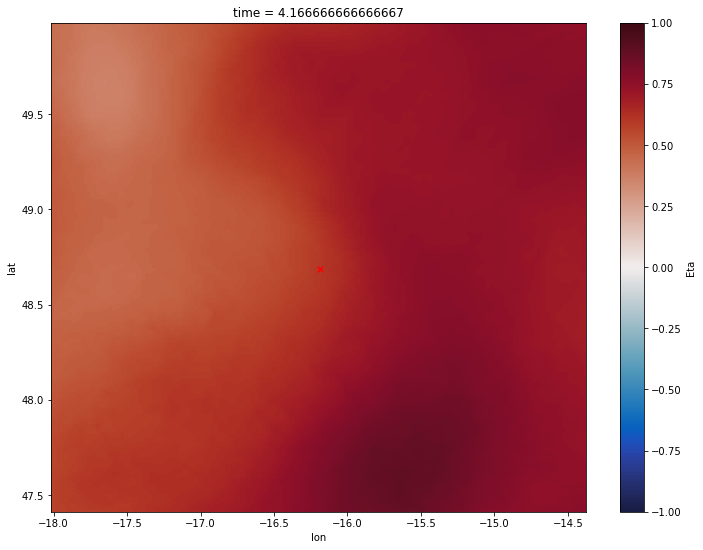

In [10]:
fig = plt.figure(figsize=(12,9))
ax = plt.subplot(111)
ds_surface.Eta.isel(time=100).isel(lat=slice(1,-1),lon=slice(1,-1)).plot(x='lon', y='lat', vmin=-1, vmax=1, cmap=cm.balance)
ax.scatter(-16.1875,48.6875,s=32,marker='x',color='r')

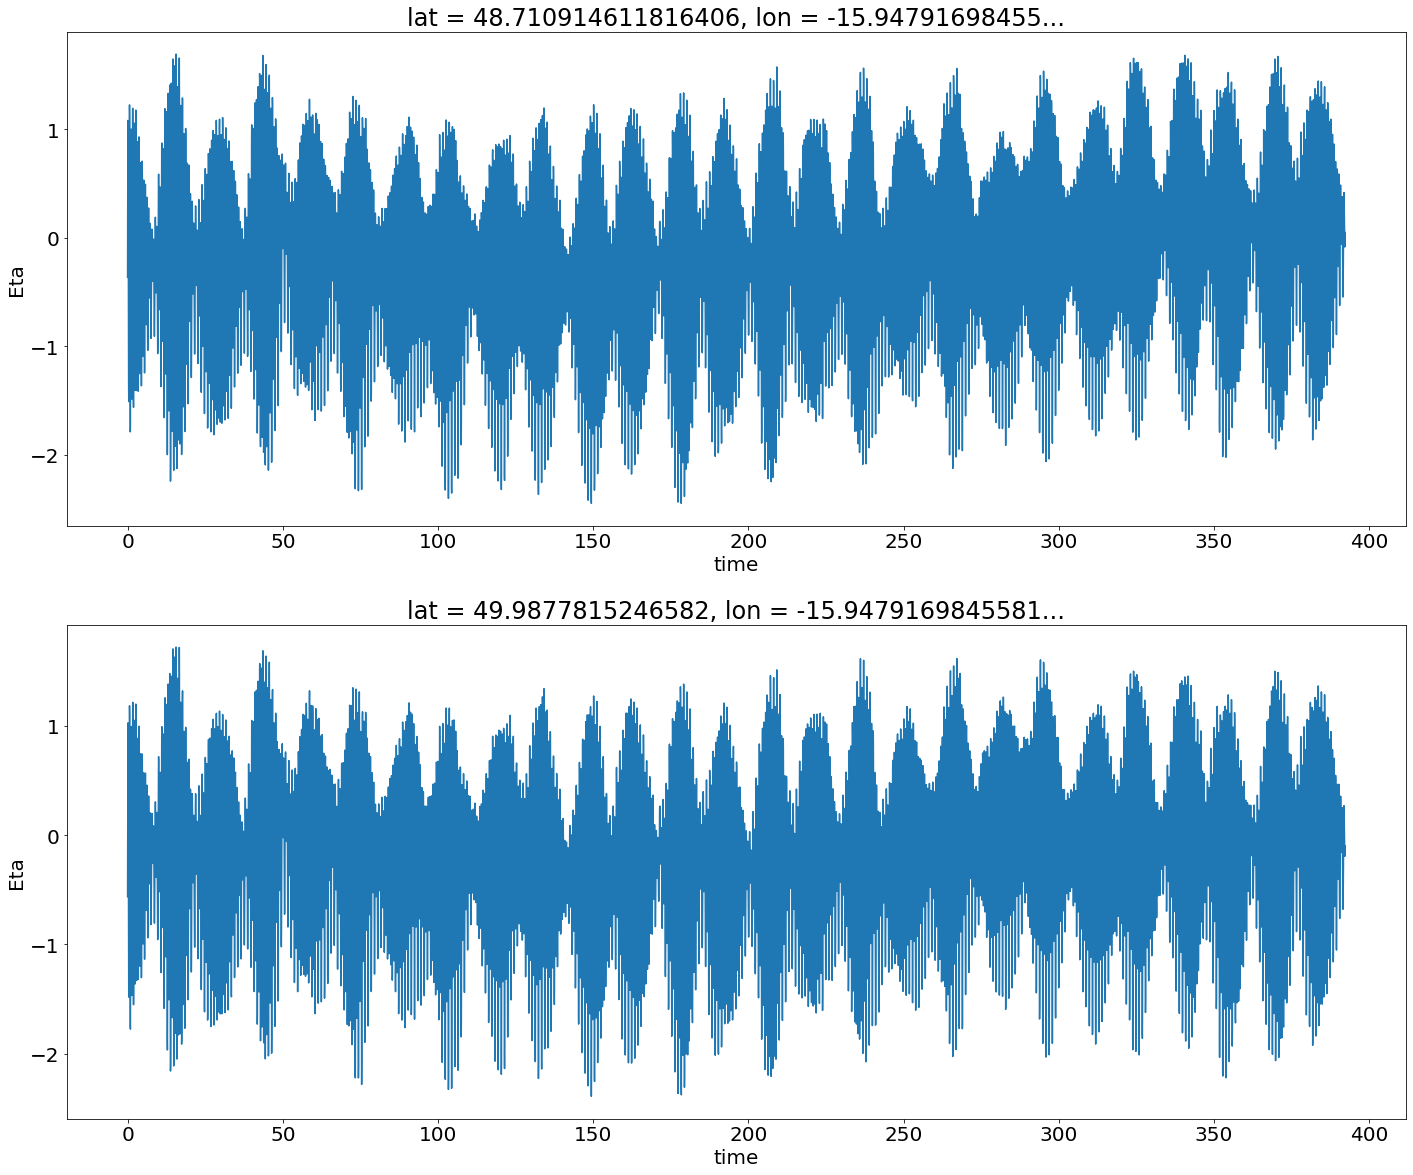

In [11]:
plt.rc('font', size=20) 
font_size=20
fig, ax = plt.subplots(figsize=(24,20))

ax = plt.subplot(211)
ds_surface.Eta.isel(lat=100,lon=100).plot(x='time')

ax = plt.subplot(212)
ds_surface.Eta.isel(lat=200,lon=100).plot(x='time')

In [13]:
cluster.close()